In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tifffile as tiff
import nd2
import stackview
import pprint

# Test the localization precision on actual data obtained by Kristina

## Import the data

In [3]:
im = nd2.imread("/tungstenfs/scratch/ggiorget/kristina/Microscopy/20240419/20240419_B2_200ms_7%laser_power_ND_016.nd2")

In [4]:
met = nd2.ND2File("/tungstenfs/scratch/ggiorget/kristina/Microscopy/20240419/20240419_B2_200ms_7%laser_power_ND_016.nd2")

In [74]:
met.unstructured_metadata()['ImageAttributesLV']

{'SLxImageAttributes': {'uiWidth': 976,
  'uiWidthBytes': 7808,
  'uiHeight': 976,
  'uiComp': 4,
  'uiBpcInMemory': 16,
  'uiBpcSignificant': 16,
  'uiSequenceCount': 21,
  'uiTileWidth': 976,
  'uiTileHeight': 976,
  'eCompression': 2,
  'dCompressionParam': -1.0,
  'ePixelType': 1,
  'uiVirtualComponents': 4}}

In [81]:
met.unstructured_metadata()['ImageMetadataSeqLV|0']

{'SLxPictureMetadata': {'dTimeMSec': 407.12799921631813,
  'dTimeAbsolute': 2460420.0449138656,
  'eTimeSource': 0,
  'dXPos': -17601.0,
  'dYPos': -2849.2000000000003,
  'uiRow': 0,
  'uiCon20(L': 0,
  'dZPos': 6187.66,
  'bZPosAbsolute': True,
  'dAngle': 3.13899821371011,
  'sPicturePlanes': {'uiCount': 4,
   'uiCompCount': 4,
   'sPlaneNew': {'a0': {'uiCompCount': 1,
     'uiSampleIndex': 0,
     'uiModalityMask': 257,
     'pFluorescentProbe': {'m_sName': '',
      'm_uiColor': 16777215,
      'm_ExcitationSpectrum': {'uiCount': 0, 'pPoint': {}, 'bPoints': False},
      'm_EmissionSpectrum': {'uiCount': 0, 'pPoint': {}, 'bPoints': False}},
     'pFilterPath': {'m_sDescr': '',
      'm_uiCount': 1,
      'm_pFilter': {'i0000000000': {'m_sUserName': 'Custom',
        'm_sName': 'Custom',
        'm_ePlacement': 6,
        'm_eNature': 0,
        'm_eSpctType': 1,
        'm_uiColor': 65429,
        'm_ExcitationSpectrum': {'uiCount': 1,
         'pPoint': {'Point0': {'eType': 4,
   

In [79]:
for f in met.unstructured_metadata():
    print(f)
    #print(met.unstructured_metadata()[f])

ImageAttributesLV
ImageCalibrationLV|0
ImageEventsLV
ImageMetadataLV
ImageMetadataSeqLV|0
ImageTextInfoLV


In [5]:
pp = pprint.PrettyPrinter(indent=2)
pp.pprint(met.metadata)

Metadata(contents=Contents(channelCount=4, frameCount=21),
         channels=[ Channel(channel=ChannelMeta(name='514',
                                                index=0,
                                                color=Color(r=149, g=255, b=0, a=1.0),
                                                emissionLambdaNm=514.0,
                                                excitationLambdaNm=552.0),
                            loops=LoopIndices(NETimeLoop=None,
                                              TimeLoop=None,
                                              XYPosLoop=None,
                                              ZStackLoop=0),
                            microscope=Microscope(objectiveMagnification=100.0,
                                                  objectiveName='Apo TIRF 100x '
                                                                'Oil DIC N2',
                                                  objectiveNumericalAperture=1.49,
                     

In [84]:
met.text_info

{'description': 'Metadata:\r\nDimensions: Z(21) x λ(2)\r\nCamera Name: Dual Fusion\r\nNumerical Aperture: 1.49\r\nRefractive Index: 1.515\r\nNumber of Picture Planes: 4\r\nPlane #1:\r\n Name: 514\r\n Component Count: 1\r\n Modality: Widefield Fluorescence\r\n Camera Settings:   Exposure: 200 ms\r\n  Binning: 2x2\r\n  Scan Mode: Standard\r\n  Temperature: -8.0°C\r\n  Denoise.ai OFF\r\n  Clarify.ai OFF\r\n  Master Camera Flip: Off\r\n  Slave Camera Flip: Off\r\n  Master Camera Rotate: 0 deg\r\n  Slave Camera Rotate: 0 deg\r\n  No Alignment\r\n  Channel Order: Master, Slave\r\n Microscope Settings:   Microscope: Ti2 Microscope\r\n  Nikon Ti2, FilterChanger(Turret-Lo): 5 (405/470/552/640)\r\n  Nikon Ti2, Shutter(FL-Lo): Open\r\n  LightPath: L100\r\n  PFS, mirror: Inserted\r\n  Zoom: 1.00x\r\n  LAPP Lower Ports:\r\n     Port 2: On \r\n  \r\n  PhysicalFromDeviceBuilder, FilterChanger(Gemini): 1\r\n  NIDAQ, Shutter(AOTF): Active\r\n  NIDAQ, MultiLaser(AOTF):\r\n     Line:3; ExW:552; Power:  7

In [148]:
# capturing_info = met.text_info['capturing'].split('  ')
capturing_info = [i.split(':') for i in met.text_info['description'].split('  ') if i]
capturing_dict = {i[0].strip(): i[1].strip() for i in capturing_info if len(i) > 1}
capturing_dict

{'Metadata': '',
 'Dimensions': 'Z(21) x λ(2)',
 'Camera Name': 'Dual Fusion',
 'Numerical Aperture': '1.49',
 'Refractive Index': '1.515',
 'Number of Picture Planes': '4',
 'Plane #1': '',
 'Name': '595',
 'Component Count': '1',
 'Modality': 'Widefield Fluorescence',
 'Camera Settings': '',
 'Exposure': '200 ms',
 'Binning': '2x2',
 'Scan Mode': 'Standard',
 'Temperature': '-8.0°C',
 'Master Camera Flip': 'Off',
 'Slave Camera Flip': 'Off',
 'Master Camera Rotate': '0 deg',
 'Slave Camera Rotate': '0 deg',
 'Channel Order': 'Master, Slave',
 'Microscope Settings': '',
 'Microscope': 'Ti2 Microscope',
 'Nikon Ti2, FilterChanger(Turret-Lo)': '5 (405/470/552/640)',
 'Nikon Ti2, Shutter(FL-Lo)': 'Open',
 'LightPath': 'L100',
 'PFS, mirror': 'Inserted',
 'Zoom': '1.00x',
 'LAPP Lower Ports': '',
 'Port 2': 'On',
 'PhysicalFromDeviceBuilder, FilterChanger(Gemini)': '1',
 'NIDAQ, Shutter(AOTF)': 'Active',
 'NIDAQ, MultiLaser(AOTF)': '',
 'Line': '2; ExW',
 'Switcher (name': 'Switcher)',
 '

In [82]:
met.events()

[{'Time [s]': 0.40712799921631815,
  'Index': 0,
  'Z Index': 0,
  'Z-Series': 2.0,
  'Camera 1 Exposure Time [ms]': 200.0,
  'PFS Offset': 6822,
  'PFS Status': 3,
  'X Coord [µm]': -17601.0,
  'Y Coord [µm]': -2849.2000000000003,
  'Z Coord [µm]': 6187.66,
  'Ti2 ZDrive [µm]': 6237.66,
  'NIDAQ Piezo Z (name: Piezo Z) [µm]': 50.0},
 {'Time [s]': 1.2360269249975682,
  'Index': 1,
  'Z Index': 1,
  'Z-Series': 1.8,
  'Camera 1 Exposure Time [ms]': 200.0,
  'PFS Offset': 6822,
  'PFS Status': 3,
  'X Coord [µm]': -17601.0,
  'Y Coord [µm]': -2849.2000000000003,
  'Z Coord [µm]': 6187.4400000000005,
  'Ti2 ZDrive [µm]': 6237.4400000000005,
  'NIDAQ Piezo Z (name: Piezo Z) [µm]': 50.0},
 {'Time [s]': 2.2535969933569433,
  'Index': 2,
  'Z Index': 2,
  'Z-Series': 1.6,
  'Camera 1 Exposure Time [ms]': 200.0,
  'PFS Offset': 6822,
  'PFS Status': 3,
  'X Coord [µm]': -17601.0,
  'Y Coord [µm]': -2849.2000000000003,
  'Z Coord [µm]': 6187.3,
  'Ti2 ZDrive [µm]': 6237.3,
  'NIDAQ Piezo Z (nam

In [83]:
met.voxel_size()

VoxelSize(x=0.13, y=0.13, z=0.2)

In [9]:
image = im[:,2,...]
stackview.slice(image, continuous_update=True,zoom_factor=0.5)

In [12]:
import detection_utils as du

In [13]:
im.shape

(21, 4, 976, 976)

In [14]:
image = np.expand_dims(image, axis=0)

In [15]:
image.shape

(1, 21, 976, 976)

In [20]:
df_loc_filtered = du.hmax_3D(image,frame=0,sd=2000,threads=5)

Runtime


In [21]:
df_loc_filtered

,x,y,z,sd_fit_x,sd_fit_y,sd_fit_z,frame
1,321.587708,598.876973,7.349087,0.151965,0.171723,0.275774,0
2,428.757389,615.032373,12.140965,0.122659,0.145818,0.144173,0
7,900.578945,470.450837,1.221148,0.267672,0.273376,0.073950,0


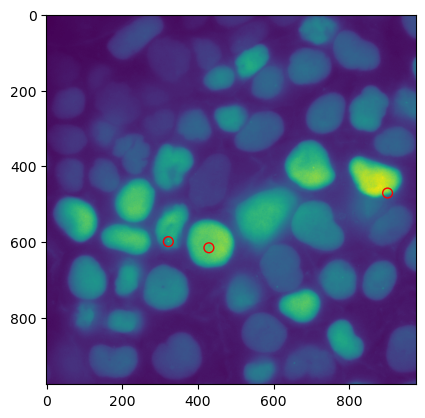

In [31]:
plt.imshow(image[0,7,...])
plt.scatter(df_loc_filtered['x'], df_loc_filtered['y'], edgecolors='r', s=50, facecolors='none')

In [48]:
image = im[:,1,...]
image = np.expand_dims(image, axis=0)
df_loc_filtered2 = du.hmax_3D(image,frame=0,sd=200,threads=5,n=2)

In [49]:
df_loc_filtered2

,x,y,z,sd_fit_x,sd_fit_y,sd_fit_z,frame
8,33.568671,423.964845,10.215672,0.167128,0.202760,0.303785,0
29,214.607961,209.146350,17.919252,0.135951,0.180933,0.179056,0
34,540.082186,284.497089,5.547333,0.204523,0.173606,0.093353,0
45,321.406386,597.750642,8.426738,0.148054,0.156924,0.376552,0
47,340.000000,153.628487,1.279610,0.386165,0.158741,0.303319,0
57,557.989811,691.017560,5.317406,0.135377,0.134789,0.245342,0
70,632.185227,563.096251,17.932437,0.083928,0.097828,0.123270,0
85,886.710399,722.939358,8.987844,0.228093,0.349163,0.112316,0
90,609.486659,733.008622,11.333254,0.166007,0.120258,0.084148,0
93,111.000000,801.402196,1.030538,0.462572,0.178565,0.379973,0


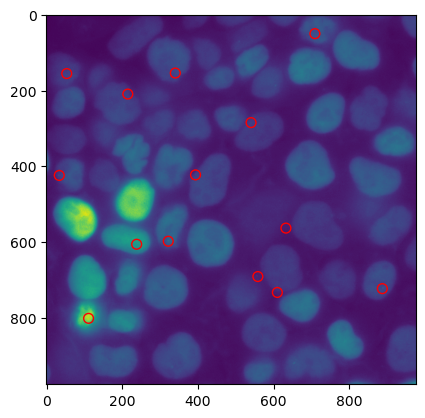

In [50]:
plt.imshow(image[0,9,...])
plt.scatter(df_loc_filtered2['x'], df_loc_filtered2['y'], edgecolors='r', s=50, facecolors='none')

In [51]:
from scipy.spatial import distance_matrix
def assign_closest_v2(df1,df2,cutoff):
    d = distance_matrix(df1[['x','y','z']].values,df2[['x','y','z']].values)
    matched = []

    for i in range(len(d)):
        # loop over the rows of the matrix
        index = np.argsort(d[i]) # sort the row by distance (closest first)
        sort = d[i][index] # sorted distances
        for j in range(len(sort)): # loop over distances
            d_col = d[:,index[j]] # get the column of the distance matrix (corresponding to the closest spot in the other channel)
            if sort[j] > cutoff: # if the distance is greater than the cutoff, break the loop
                break
            else:
                if np.min(d_col) < sort[j]:
                    # no match
                    pass
                else:
                    #matched.append([i,index[j],sort[j]])
                    matched.append([i,index[j],sort[j],df1[['x','y','z']].values[i] - df2[['x','y','z']].values[index[j]]])
                    #print(df1[['x','y','z']].values[i] - df2[['x','y','z']].values[index[j]])
    return matched

In [52]:
matched = assign_closest_v2(df_loc_filtered,df_loc_filtered2,100)

In [55]:
df_loc_filtered

,x,y,z,sd_fit_x,sd_fit_y,sd_fit_z,frame
1,321.587708,598.876973,7.349087,0.151965,0.171723,0.275774,0
2,428.757389,615.032373,12.140965,0.122659,0.145818,0.144173,0
7,900.578945,470.450837,1.221148,0.267672,0.273376,0.073950,0


In [56]:
df_loc_filtered2

,x,y,z,sd_fit_x,sd_fit_y,sd_fit_z,frame
8,33.568671,423.964845,10.215672,0.167128,0.202760,0.303785,0
29,214.607961,209.146350,17.919252,0.135951,0.180933,0.179056,0
34,540.082186,284.497089,5.547333,0.204523,0.173606,0.093353,0
45,321.406386,597.750642,8.426738,0.148054,0.156924,0.376552,0
47,340.000000,153.628487,1.279610,0.386165,0.158741,0.303319,0
57,557.989811,691.017560,5.317406,0.135377,0.134789,0.245342,0
70,632.185227,563.096251,17.932437,0.083928,0.097828,0.123270,0
85,886.710399,722.939358,8.987844,0.228093,0.349163,0.112316,0
90,609.486659,733.008622,11.333254,0.166007,0.120258,0.084148,0
93,111.000000,801.402196,1.030538,0.462572,0.178565,0.379973,0


(590.0, 605.0)

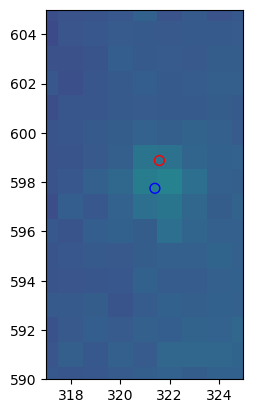

In [68]:
plt.scatter(df_loc_filtered['x'], df_loc_filtered['y'], edgecolors='r', s=50, facecolors='none')
plt.scatter(df_loc_filtered2['x'], df_loc_filtered2['y'], edgecolors='b', s=50, facecolors='none')
plt.imshow(image[0,8,...])
plt.xlim(317,325)
plt.ylim(590,605)

In [53]:
matched

[[0, 3, 1.5693408532138198, array([ 0.18132201,  1.12633144, -1.07765046])],
 [0, 11, 84.06965881520982, array([83.58770763, -6.87902147,  5.78633993])]]